<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/WW2_Aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/LearningAI_CSV/WW2_Aircraft/world_war_2_aircrafts.csv")

In [2]:
#Inspect Data
print("Print Data Head")
print(df.head())
print("\nTotal Null Amount")
print(df.isnull().sum())
print('\nData Description')
print(df.describe())
print('\nData Info')
print(df.info())

Print Data Head
      Aircraft Type  Aircraft Subtype                 Aircraft Name  \
0  Fighter aircraft  Biplane fighters  Armstrong Whitworth Scimitar   
1  Fighter aircraft  Biplane fighters                    Avia B-534   
2  Fighter aircraft  Biplane fighters                    Avia BH-33   
3  Fighter aircraft  Biplane fighters            Blériot-SPAD S.510   
4  Fighter aircraft  Biplane fighters                   Boeing P-12   

  Year in Service Country of Origin  \
0            1936                UK   
1            1935    Czechoslovakia   
2            1927    Czechoslovakia   
3            1936            France   
4            1930                US   

     Operator(s) if different from country of origin  
0                                             Norway  
1  Czechoslovakia, Bulgaria, Germany, Greece, Slo...  
2                                         Yugoslavia  
3                                                NaN  
4               Brazil, China, Philippines, Tha

In [3]:
#Feature Engineering
#1.Extracting Manfacturer Name from aircraft name
df['Manufacturer'] = df['Aircraft Name'].str.split().str[0].str.strip()
#2.Extracting in which decade was the plane manufactured.
  # Convert to numeric (will convert non-numeric to NaN)
df["Year in Service"] = pd.to_numeric(df["Year in Service"], errors='coerce')
df["Era"] = (df["Year in Service"] // 10) * 10
#3.Counting the number of international operators
df['Number of International Operators'] = df['Operator(s) if different from country of origin'].apply(
    lambda x : len(str(x).split(',')) if pd.notnull(x) else 0
)

In [ ]:
#Removing Null Rows and Resetting the index
cols_to_check = df.columns.difference(['Operator(s) if different from country of origin'])
null_rows = df[df[cols_to_check].isnull().any(axis=1)]
# df.drop(106,inplace=True)
df.reset_index(drop=True)

In [29]:
aircraft_counts = df['Aircraft Type'].value_counts()
subtypes_counts = df['Aircraft Subtype'].value_counts()

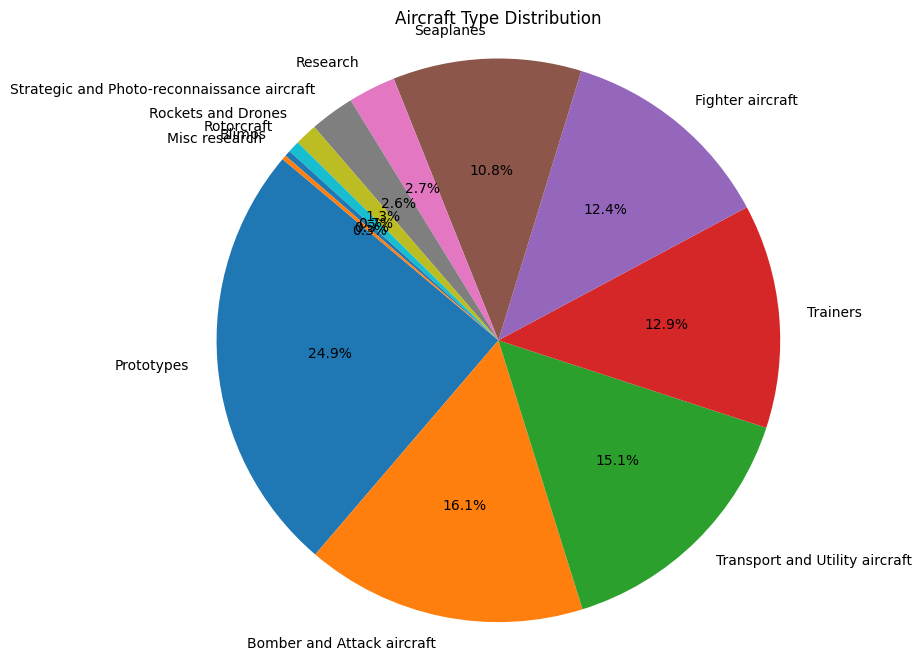

In [19]:
plt.figure(figsize=(8,8))
plt.pie(aircraft_counts,labels=aircraft_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Aircraft Type Distribution')
plt.axis('equal')
plt.show()

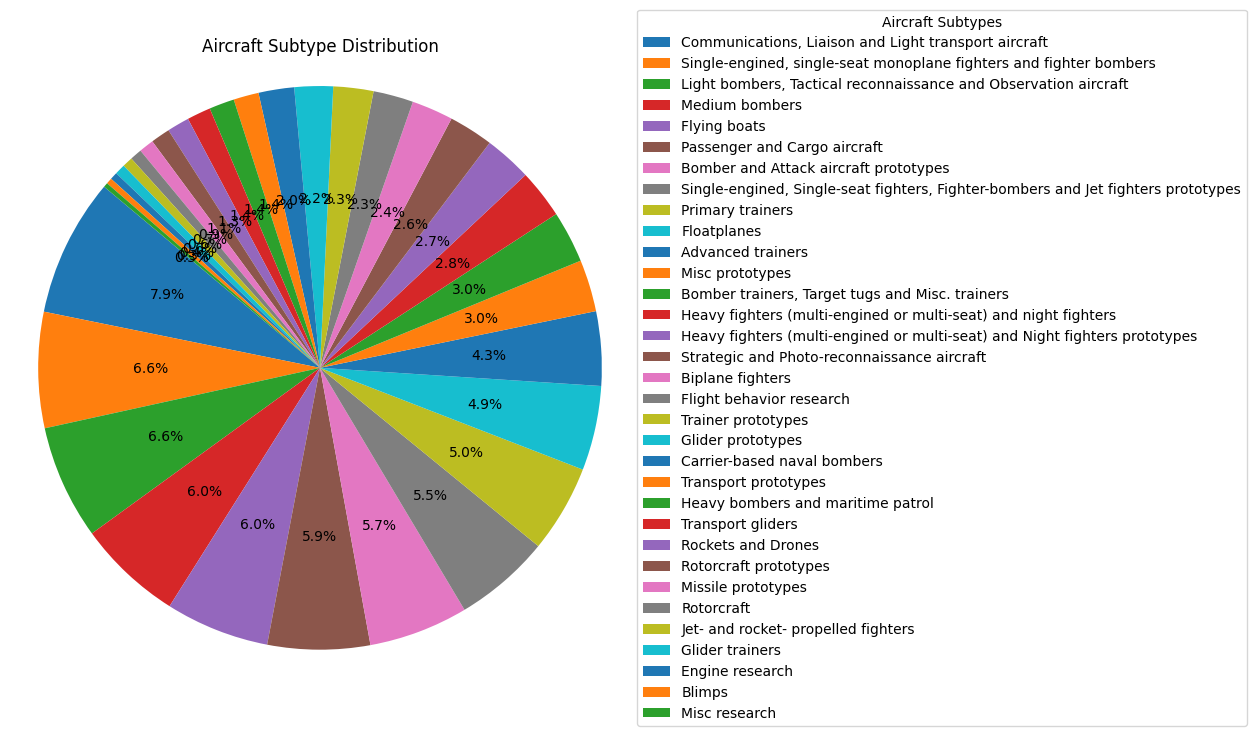

In [41]:
plt.figure(figsize=(8,8))
plt.pie(subtypes_counts, labels=None,autopct='%1.1f%%',startangle=140)
plt.legend(subtypes_counts.index, title="Aircraft Subtypes", bbox_to_anchor=(1, 0.5), loc="center left")
plt.title('Aircraft Subtype Distribution')
plt.axis('equal')
plt.show()

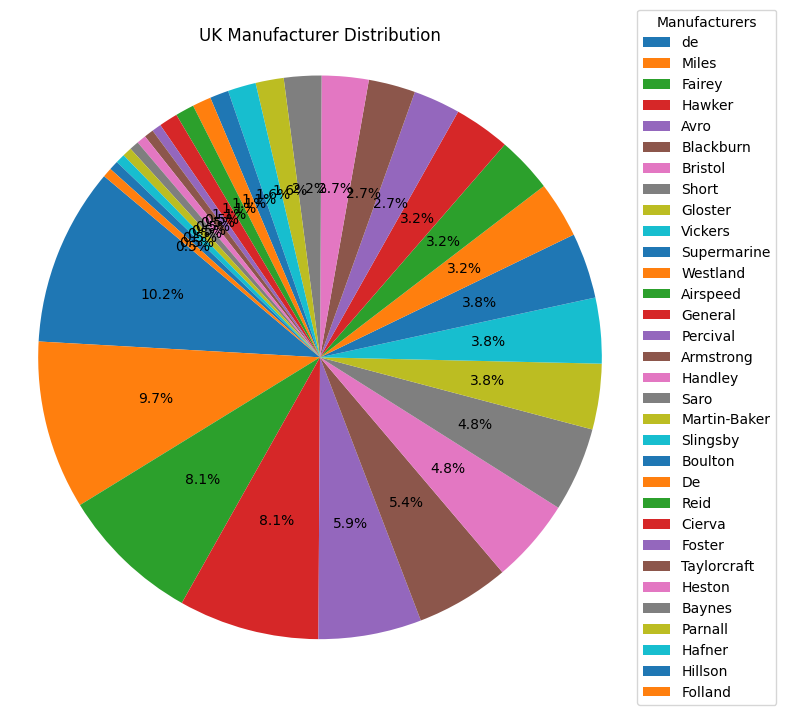

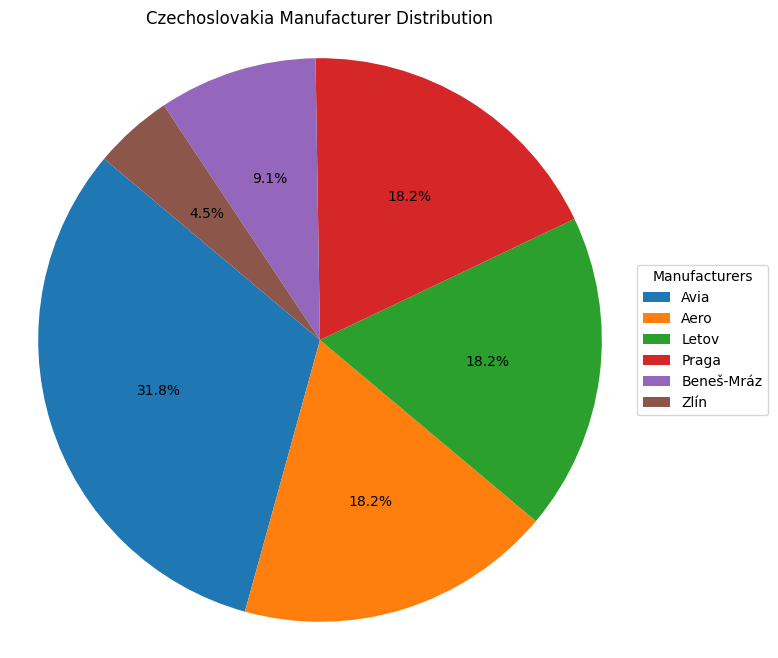

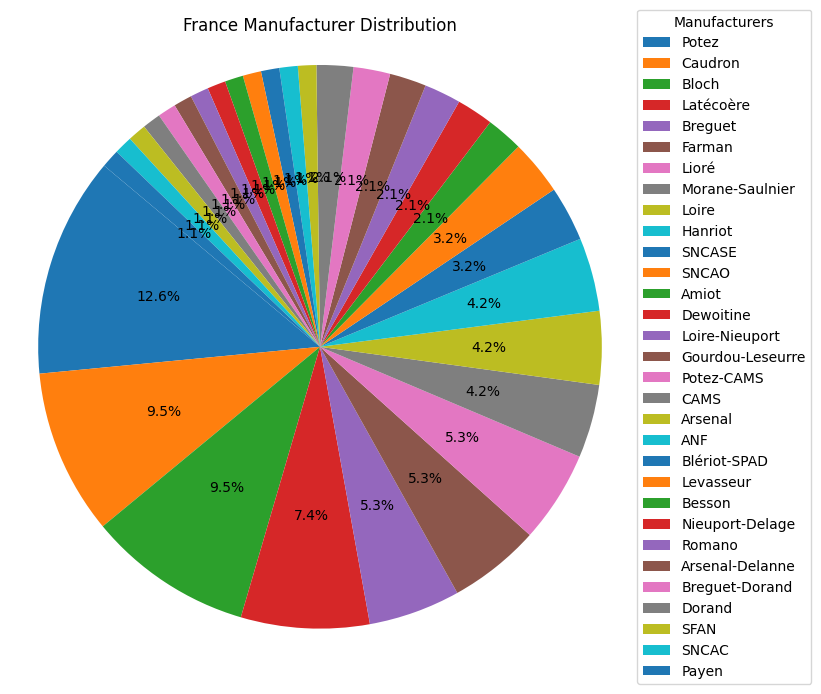

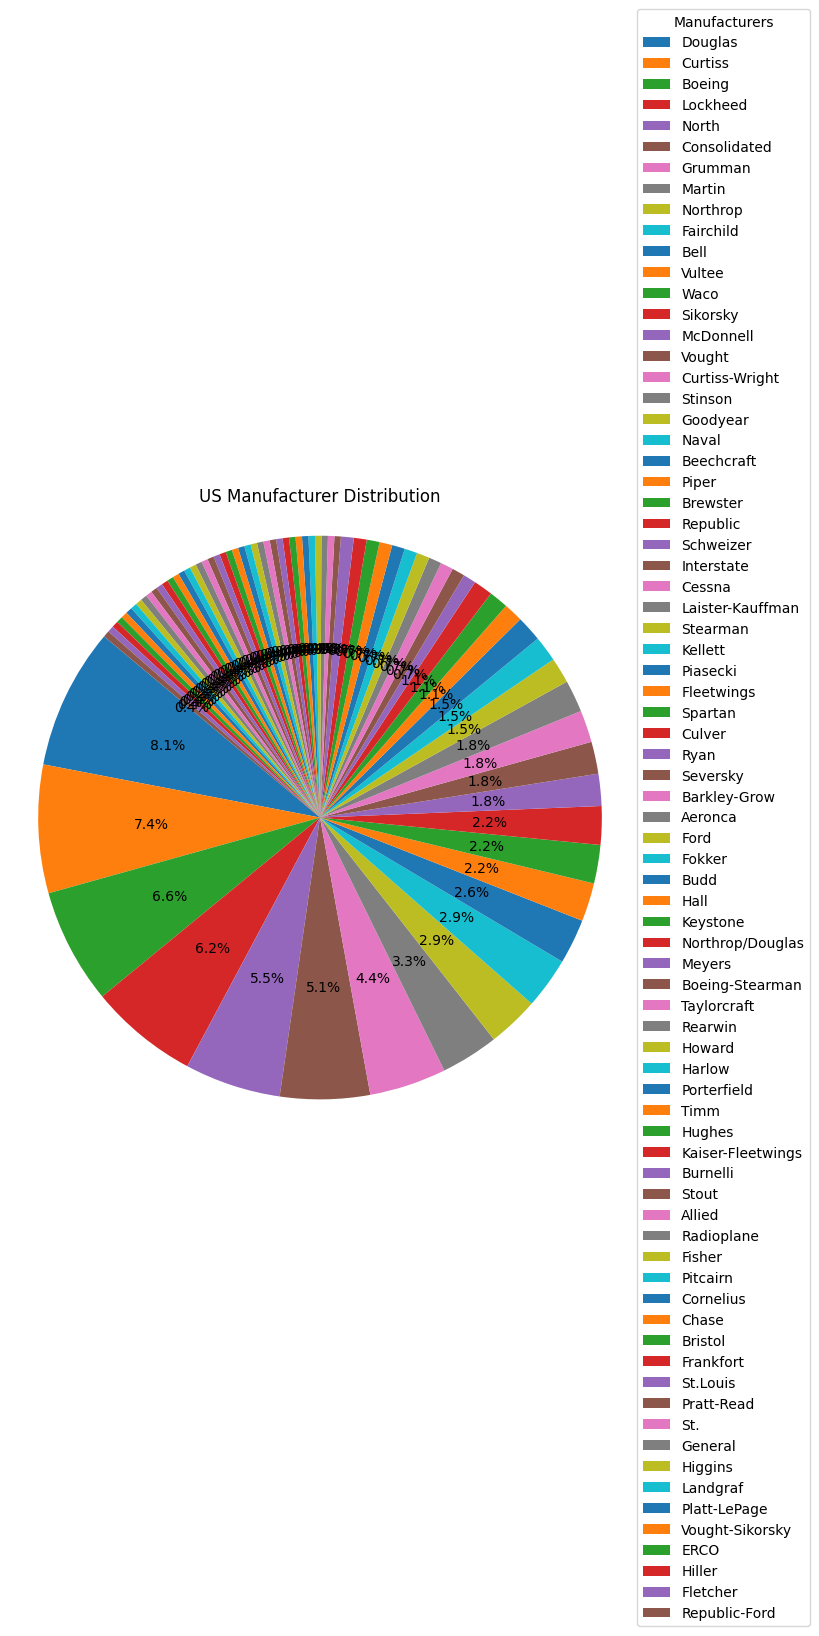

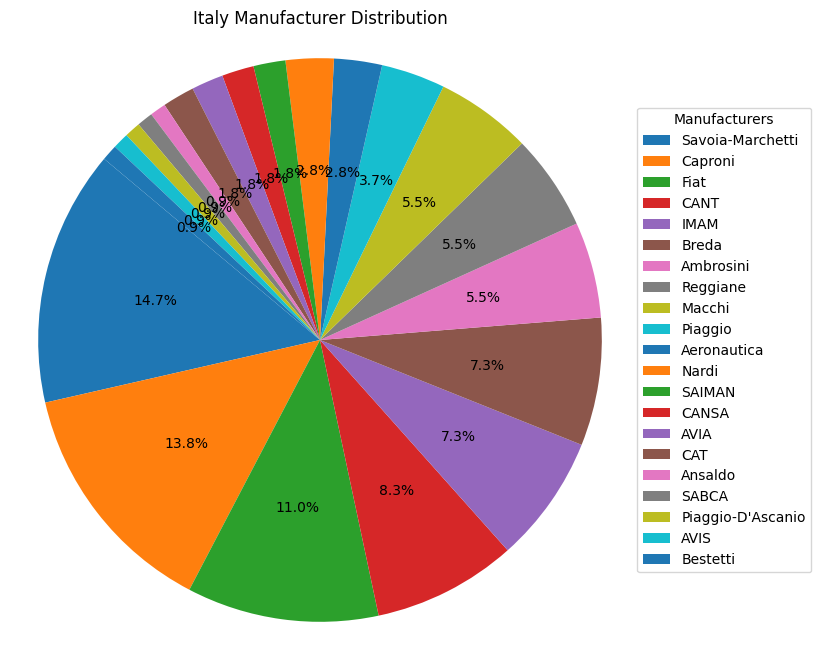

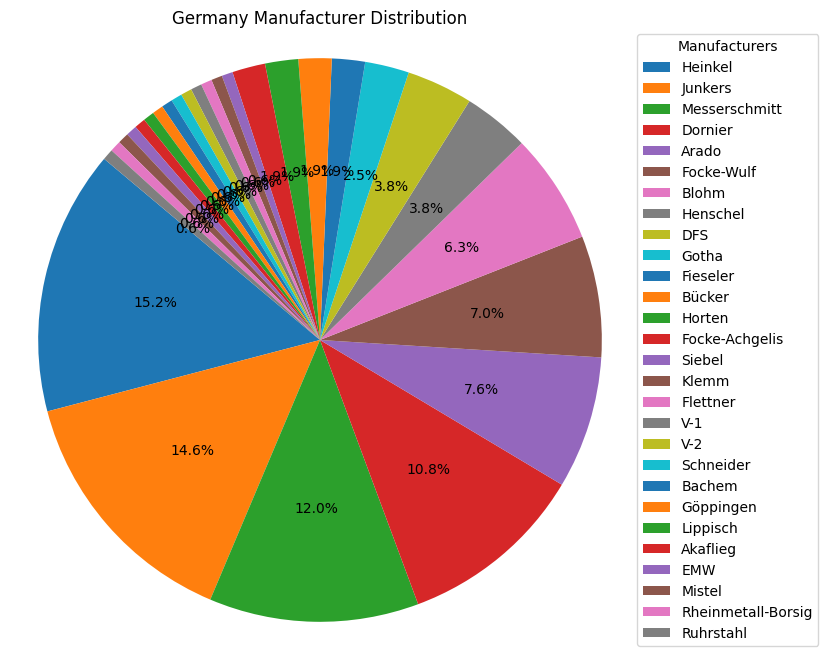

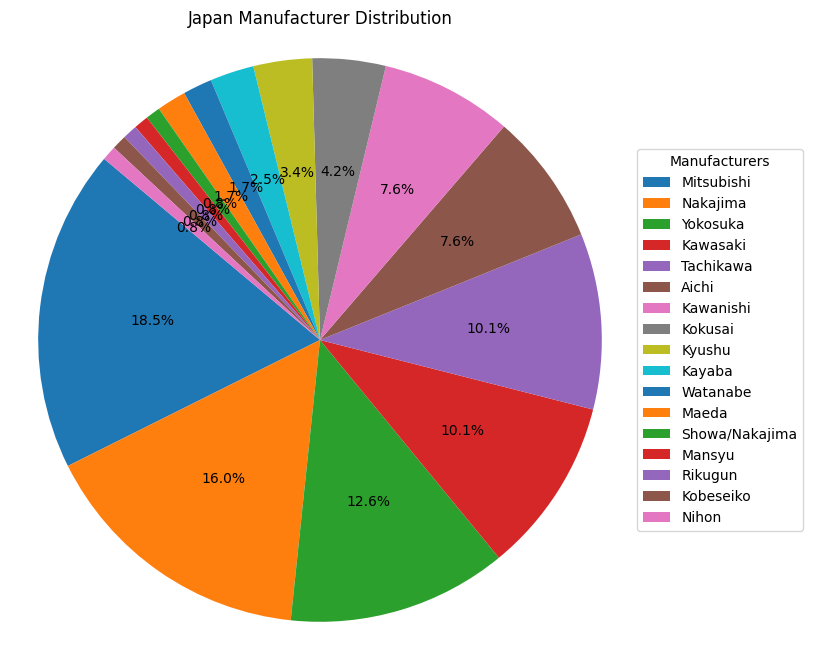

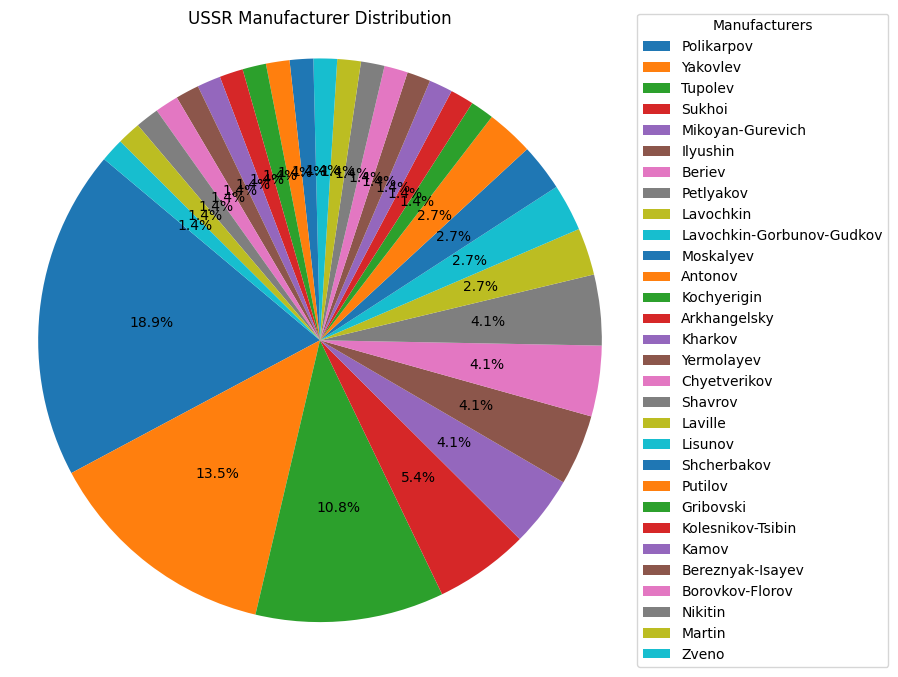

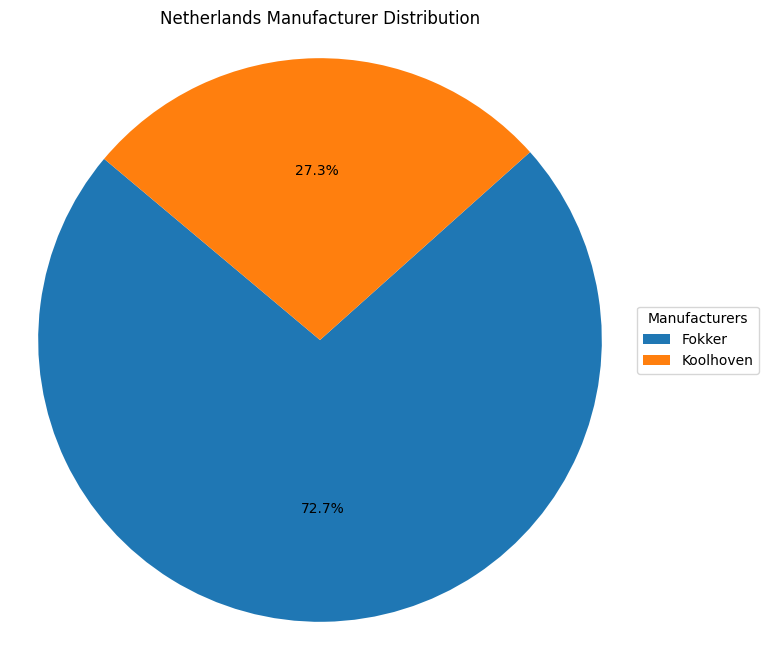

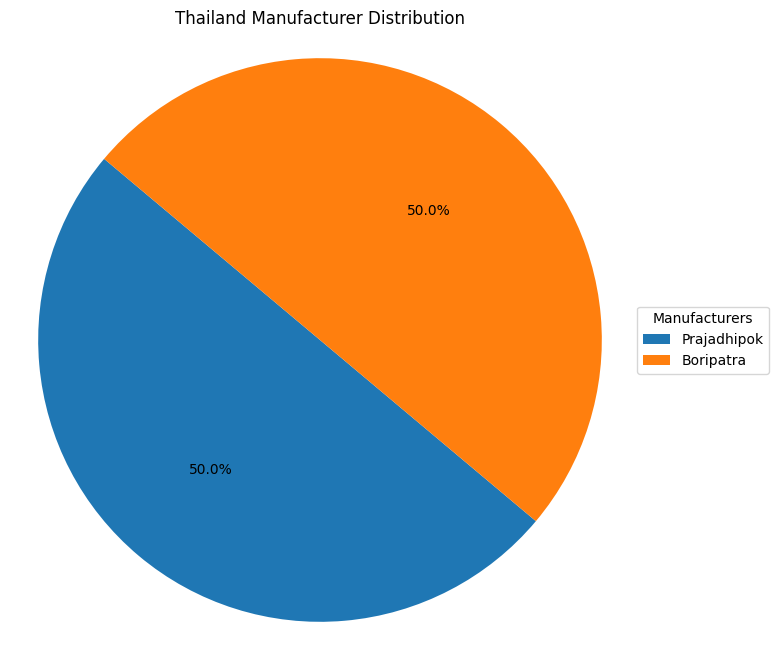

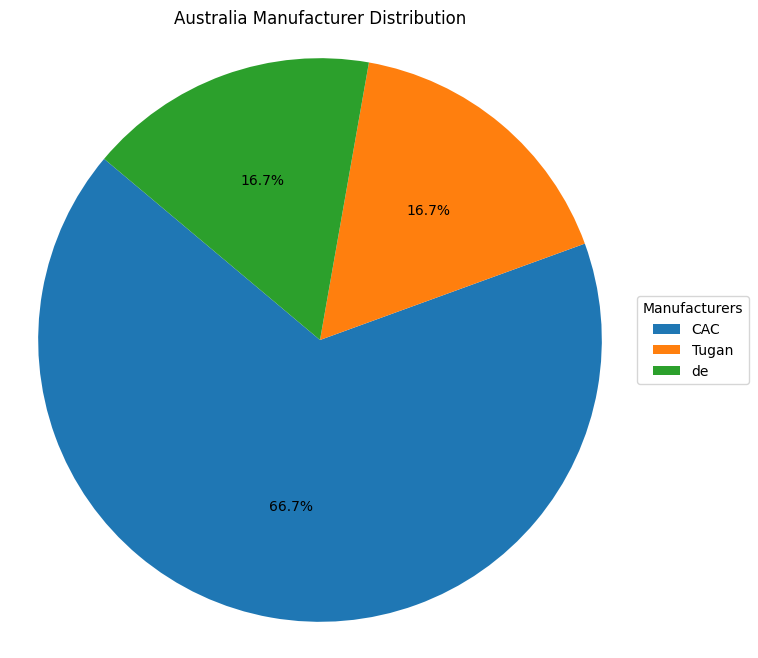

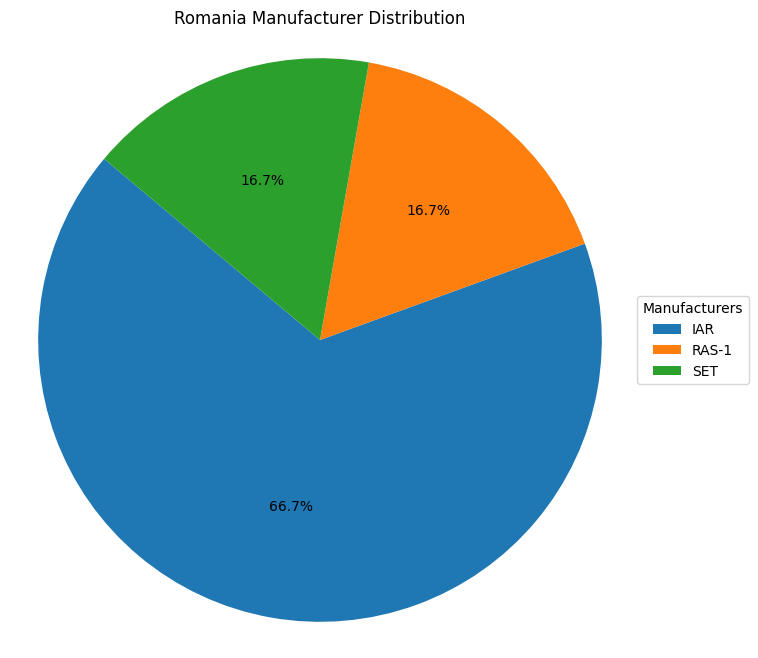

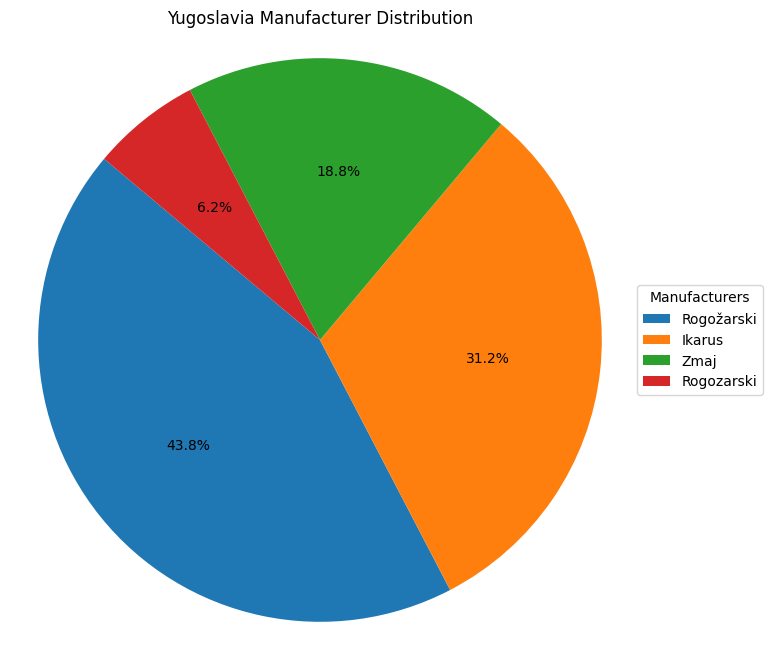

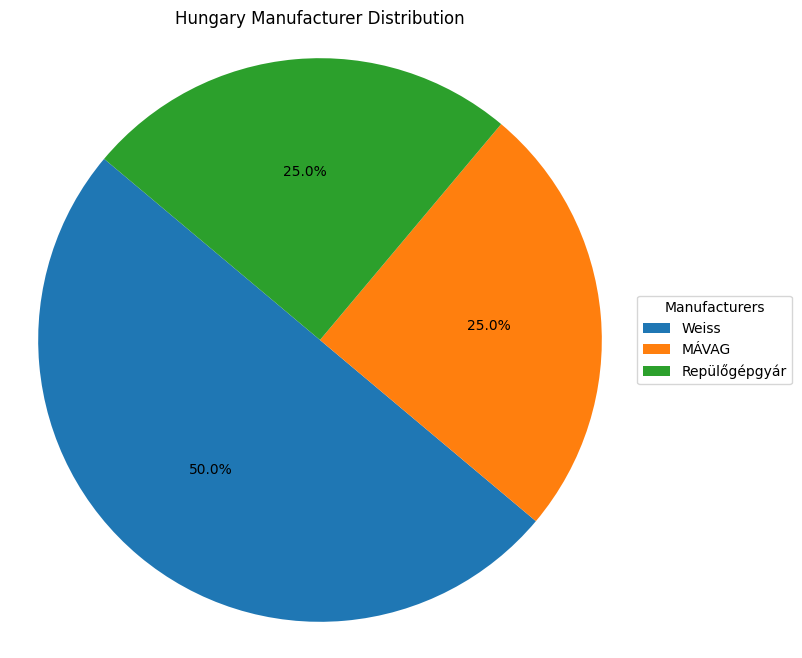

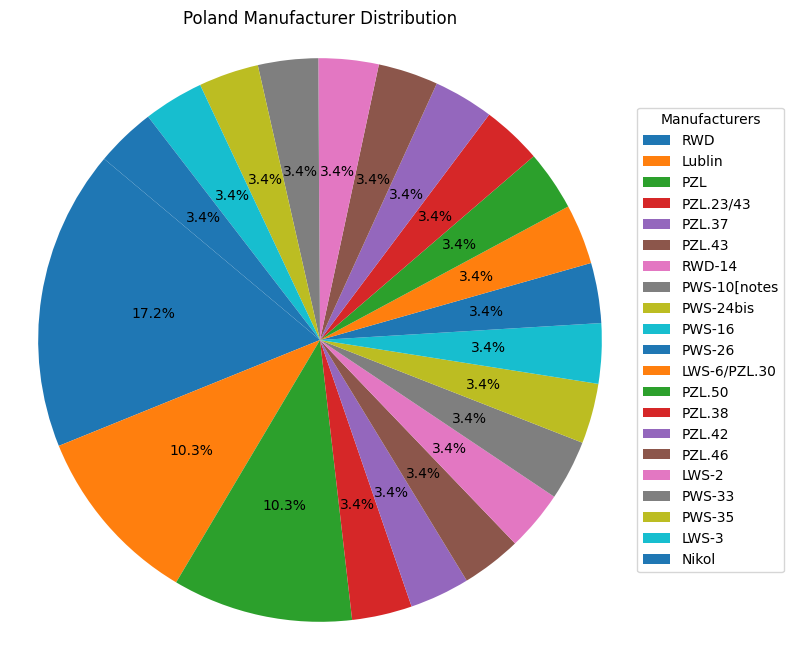

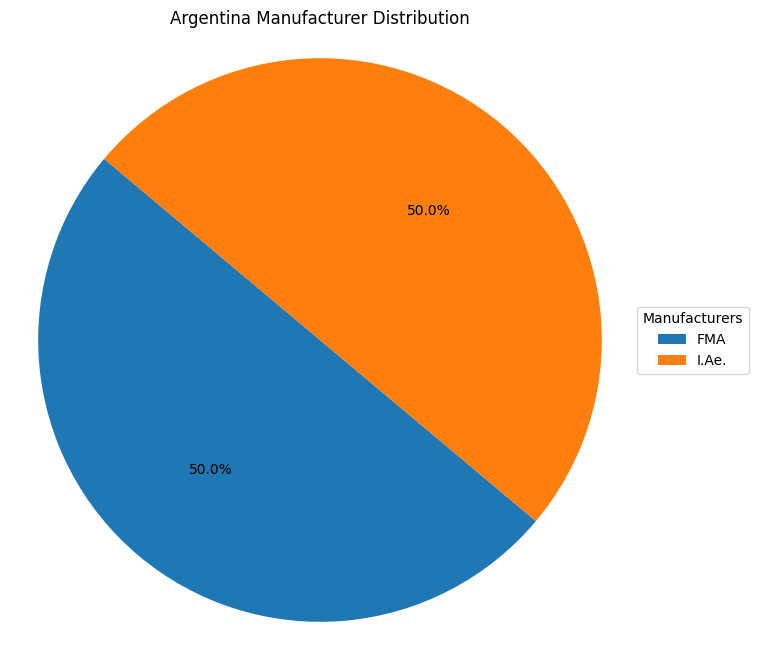

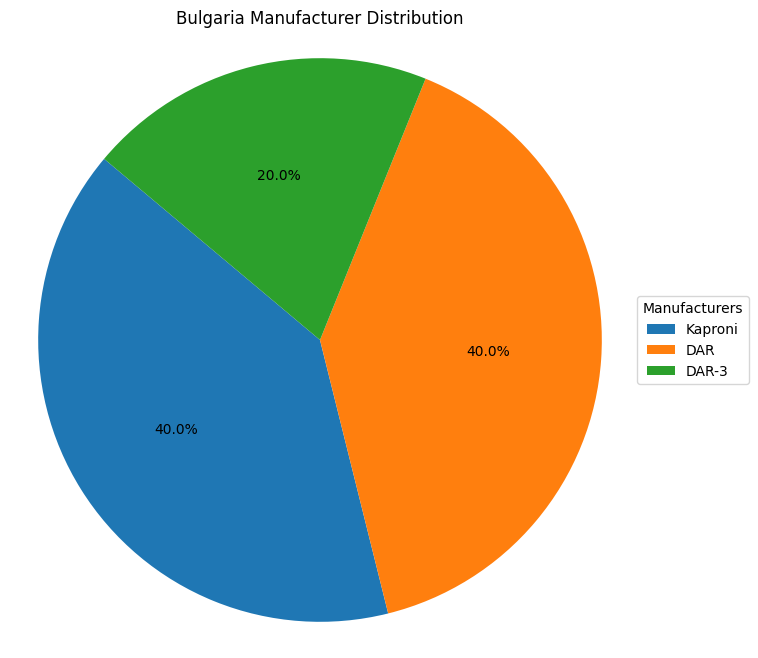

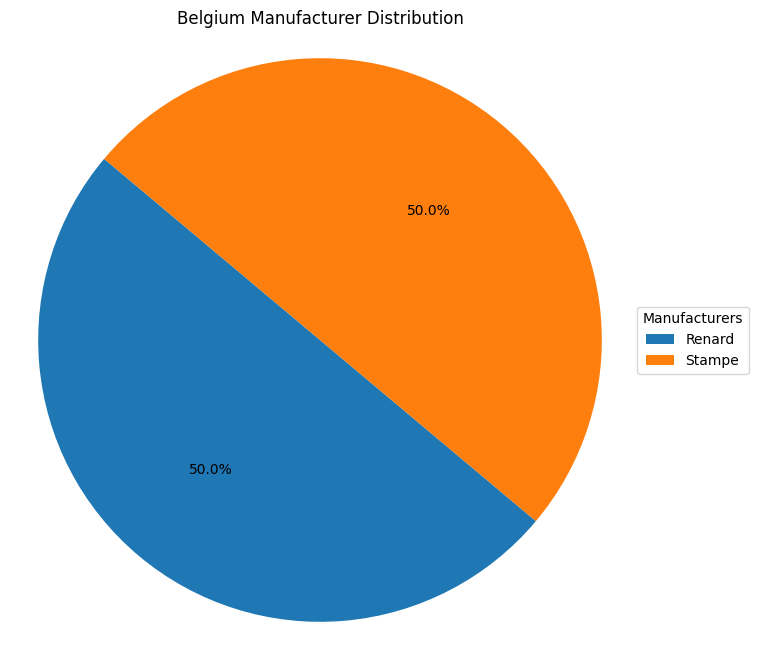

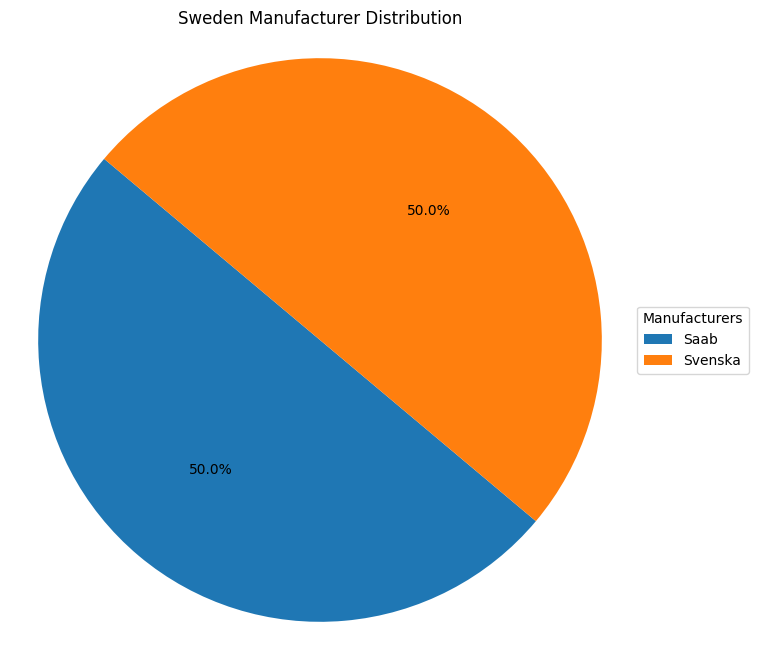

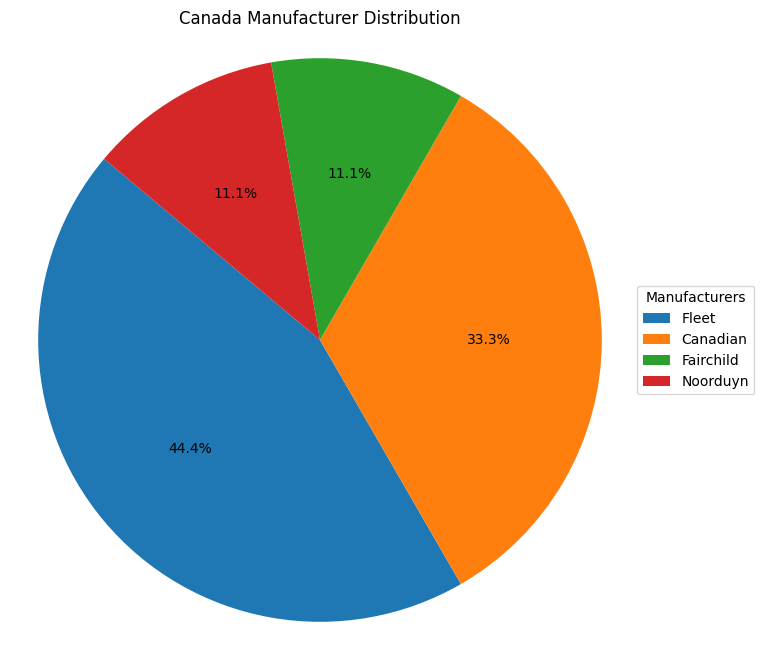

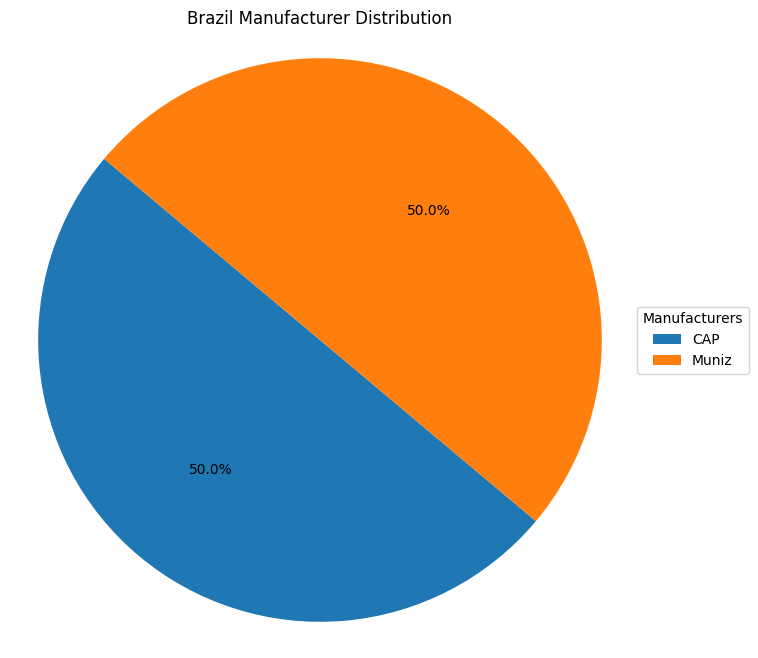

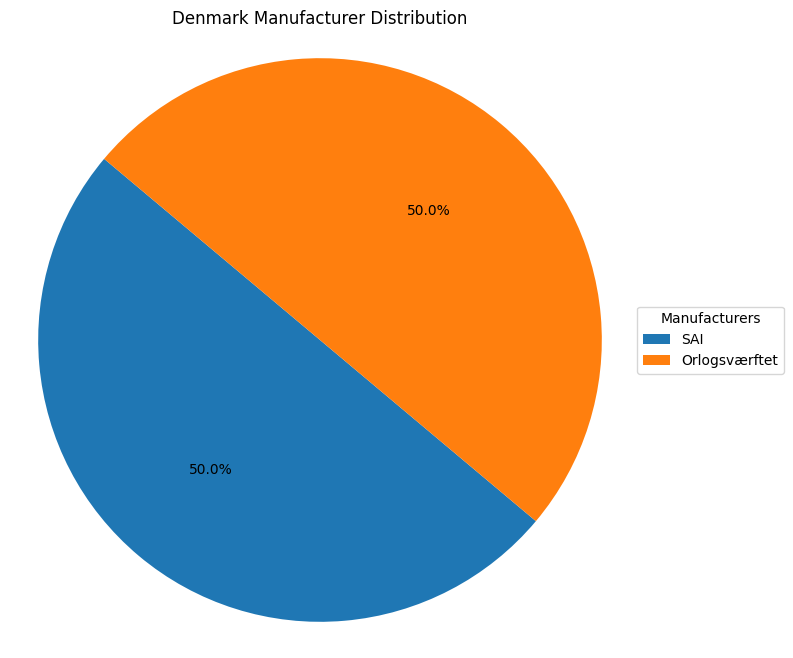

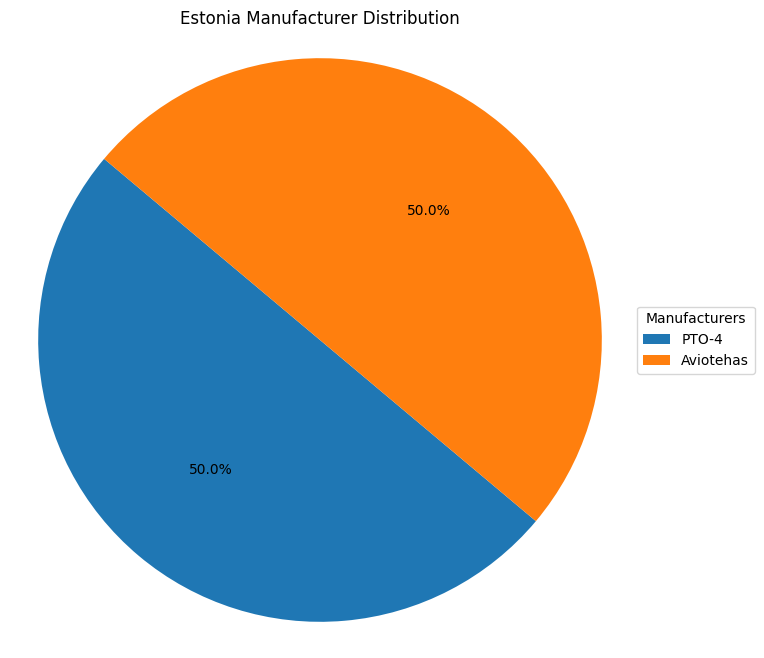

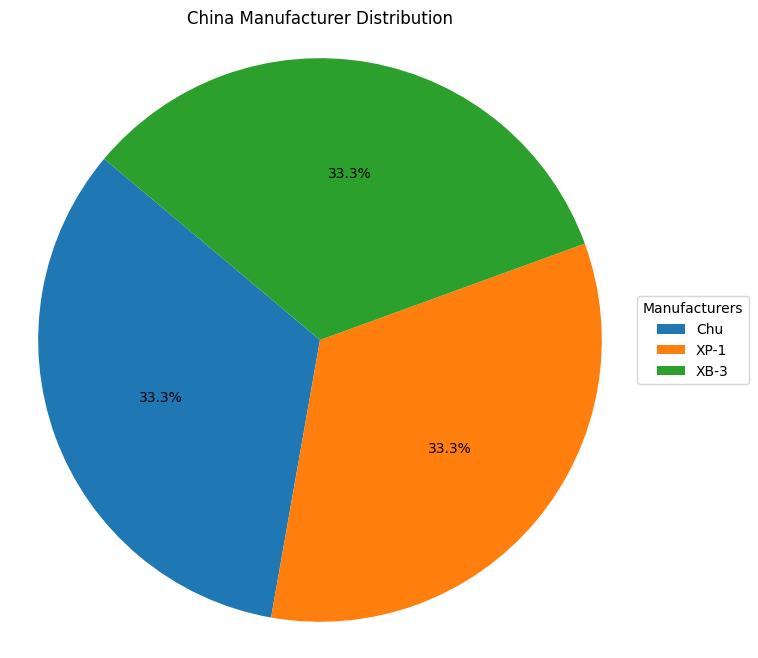

In [40]:
#Manufacturer Distribution for each nation
for country in df['Country of Origin'].unique():
  counts = df.loc[df['Country of Origin'] == country, 'Manufacturer'].value_counts()
  if len(counts)>1:
    plt.figure(figsize=(8,8))
    plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    plt.legend(counts.index, title="Manufacturers", bbox_to_anchor=(1, 0.5), loc="center left")
    plt.title(f'{country} Manufacturer Distribution')
    plt.axis('equal')
    plt.show()

In [20]:
df.loc[df['Number of International Operators']>0,'Number of International Operators'].min()

1

In [21]:
# df.loc[:,['Number of International Operators']]
# popular_aircraft = df.loc[df['Number of International Operators'] == df['Number of International Operators'].max()]
# popular_aircraft

In [22]:
df['Country of Origin'].unique()

array(['UK', 'Czechoslovakia', 'France', 'US', 'Italy', 'Germany',
       'Japan', 'USSR', 'Netherlands', 'Thailand', 'Australia', 'Romania',
       'Yugoslavia', 'Hungary', 'Poland', 'Finland', 'Argentina',
       'Bulgaria', 'Belgium', 'Sweden', 'Canada', 'Norway',
       'Germany, Japan', 'Brazil', 'Denmark', 'Lithuania', 'Slovakia',
       'Estonia', 'Turkey', 'Latvia', 'UK, Canada', 'China', 'Greece'],
      dtype=object)